In [7]:
import cv2
from scipy import interpolate
from matplotlib import cm
%matplotlib inline

In [8]:
dat = cv2.imread('fig_cov_l1l2_maps.png', -1)

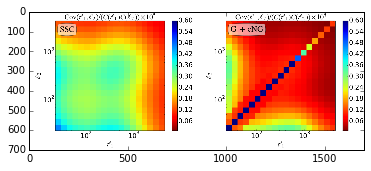

In [9]:
ax = plt.imshow(dat)

In [10]:
lower_x = 139
lower_y =  55
upper_x = 679
upper_y = 594

In [11]:
cov_fine = dat[lower_y : upper_y, lower_x : upper_x]

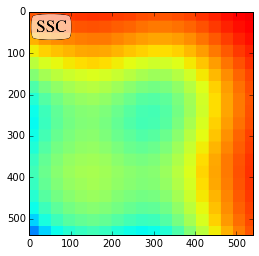

In [12]:
ax = plt.imshow(cov_fine, cmap=cm.jet)

In [60]:
import scipy.cluster.vq as scv
def colormap2arr(arr,cmap,N=100):    
    # http://stackoverflow.com/questions/3720840/how-to-reverse-color-map-image-to-scalar-values/3722674#3722674
    gradient=cmap(np.linspace(1,0.0,N)) #[:, 0:3]

    # Reshape arr to something like (240*240, 4), all the 4-tuples in a long list...
    arr2=arr.reshape((arr.shape[0]*arr.shape[1],arr.shape[2]))

    # Use vector quantization to shift the values in arr2 to the nearest point in
    # the code book (gradient).
    code,dist=scv.vq(arr2,gradient)

    # code is an array of length arr2 (240*240), holding the code book index for
    # each observation. (arr2 are the "observations".)
    # Scale the values so they are from 0 to 1.
    values=code.astype('float')/gradient.shape[0]

    # Reshape values back to (240,240)
    values=values.reshape(arr.shape[0],arr.shape[1])
    values=values[::-1, ::-1]
    return values

In [61]:
cov_sc = colormap2arr(cov_fine, cm.jet, N=300)
#cov_sc = cov_fine

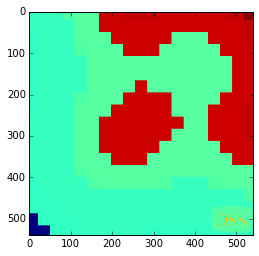

In [62]:
ax = plt.imshow(cov_sc)

In [63]:
npix = 19

In [64]:
n = upper_x - lower_x

In [65]:
step = int(n / npix)

In [66]:
cov = cov_sc[0:n:step,0:n:step]

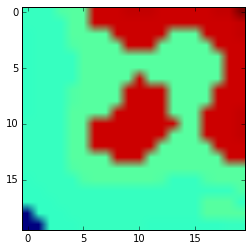

In [67]:
plt.imshow(cov)

In [68]:
x_leg = 730
lower_y_leg = 54 + 10
upper_y_leg = 590 - 10
n_leg = upper_y_leg - lower_y_leg

In [69]:
leg_fine = dat[lower_y_leg : upper_y_leg, (x_leg-5):(x_leg+15)]

In [70]:
leg_sc = colormap2arr(leg_fine, cm.jet, N=50)
#leg_sc = leg_fine

In [71]:
step = 70
leg = leg_sc[0:n_leg:step, :]

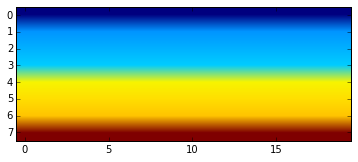

In [72]:
plt.imshow(leg)

In [73]:
leg0 = leg[:,0]
leg0

array([ 0.12,  0.32,  0.34,  0.36,  0.6 ,  0.62,  0.64,  0.86])

In [149]:
v0 = 0
v1 = 0.6
v = np.linspace(v0, v1, len(leg0))
leg_interp = interpolate.interp1d(leg0[::-1], v, kind='linear', bounds_error=False, fill_value=0)

In [150]:
my_v = leg_interp(0.2)
my_v

array(0.5657142857142857)

In [146]:
leg0

array([ 0.12,  0.32,  0.34,  0.36,  0.6 ,  0.62,  0.64,  0.86])

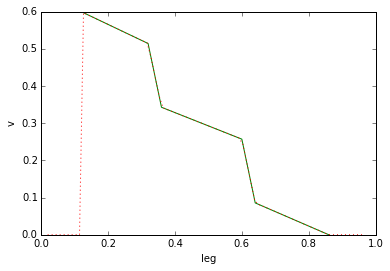

In [151]:
plt.plot(leg0[::-1], v, 'g-')
leg0_10 = np.linspace(leg0[0]-0.1, leg0[-1]+0.1, len(leg0)*10)
plt.plot(leg0_10, leg_interp(leg0_10), 'r:')
plt.ylabel('v')
plt.xlabel('leg')

In [153]:
leg_interp(cov[:,0])

array([ 0.42857143,  0.42857143,  0.44285714,  0.44285714,  0.44285714,
        0.44285714,  0.44285714,  0.44285714,  0.44285714,  0.44285714,
        0.42857143,  0.42857143,  0.42857143,  0.42857143,  0.42857143,
        0.44285714,  0.44285714,  0.44285714,  0.        ,  0.        ])

In [155]:
cov_v = []
for i in range(cov.shape[0]):
    row = leg_interp(cov[:,i])
    cov_v.append(row)

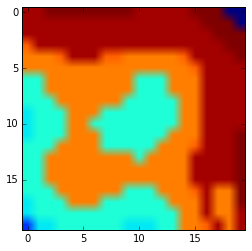

In [161]:
plt.imshow(cov_v)

In [163]:
np.diag(cov_v)

array([ 0.42857143,  0.42857143,  0.42857143,  0.42857143,  0.42857143,
        0.34285714,  0.34285714,  0.34285714,  0.34285714,  0.17142857,
        0.17142857,  0.17142857,  0.34285714,  0.34285714,  0.34285714,
        0.42857143,  0.42857143,  0.34285714,  0.34285714,  0.42857143])